<a href="https://colab.research.google.com/github/dharinidakshin05/CODSOFT-TASKS/blob/main/task2_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 1.8627936455805134


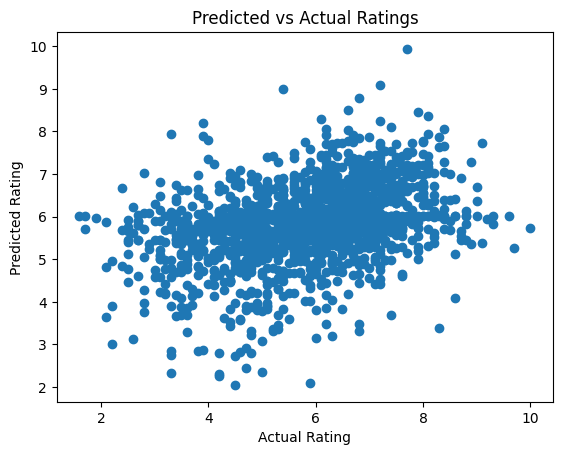

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset, try specifying the encoding
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1') # Try 'latin-1', or 'iso-8859-1' if 'latin-1' doesn't work

# Handle missing values in 'Rating' (choose one method)
# 1. Remove rows with missing ratings:
data = data.dropna(subset=['Rating'])

# OR

# 2. Impute missing ratings (e.g., with the mean):
# data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

# Define features and target AFTER handling missing values
X = data[['Genre', 'Director']]
y = data['Rating']

# Handle unknown categories in OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']), # Ignore unknown categories
        ('director', OneHotEncoder(handle_unknown='ignore'), ['Director']) # Ignore unknown categories
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predicted vs actual ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Predicted vs Actual Ratings')
plt.show()